# Time Series Analysis of BSE Stock Exchange
Hi/Hello Welcome to my notebook.
In this Notebook, I am going to perform Time-Series Analysis in BSE Sensex 30 Historical Data. This Data consists of Price openings, Highes & Lowes, Changes & Volumes of BSE Sensex 30 from the past 25 years. The Data Starts from 01-01-2000 to 02-11-2025.
You can download this data from https://in.investing.com/indices/sensex-historical-data
I hope this helps.
Regards,
Rahul Raj S Suthrave

### 1. Data Exploration and Data Preprocessing

In [8]:
import pandas as pd
monthly = pd.read_csv("/content/BSE Sensex 30 Historical Data montlhy.csv")
weekly = pd.read_csv("/content/BSE Sensex 30 Historical Data Weekly.csv")
daily_p1 = pd.read_csv("/content/BSE Sensex 30 Historical Data Daily upto feb 2020.csv") # Since Investing.com gives downloading option upto 5000 rows. We have downloaded rest of the rows and its p2
daily_p2 = pd.read_csv("/content/BSE Sensex 30 Historical Data Feb 2020 to To Nov 2025.csv")

In [9]:
monthly.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-10-2025,"83,938.71","80,173.24","85,290.06","80,159.90",304.24M,4.57%
1,01-09-2025,"80,267.62","79,828.99","83,141.21","79,818.38",241.51M,0.57%
2,01-08-2025,"79,809.65","81,074.41","82,231.17","79,741.76",246.72M,-1.69%
3,01-07-2025,"81,185.58","83,685.66","83,935.01","80,575.45",255.87M,-2.90%
4,01-06-2025,"83,606.46","81,214.42","84,099.53","80,354.59",345.46M,2.65%


### 1.1 Data Rearrangement As The Data is in Descending Time line. lets corrrect this to the Ascending Time line

#### 1.1.1 Let's Start Monthly Data

In [14]:
monthly['Date'] = pd.to_datetime(monthly['Date'], format='%d-%m-%Y')

# Sort the DataFrame so that it starts from 03-01-2000 (oldest) to the latest
monthly['Date'] = pd.to_datetime(monthly['Date'], format='%d-%m-%Y', errors='coerce')
monthly = monthly.sort_values(by='Date', ascending=True)


monthly.head()

,Date,Price,Open,High,Low,Vol.,Change %
309,2000-01-01,"5,205.29","5,209.54","5,668.28","5,184.48",570.48M,3.98%
308,2000-02-01,"5,446.98","5,217.65","6,150.69","5,127.79",496.38M,4.64%
307,2000-03-01,"5,001.28","5,464.65","5,828.79","4,867.23",397.56M,-8.18%
306,2000-04-01,"4,657.55","5,070.50","5,542.81","4,284.17",478.01M,-6.87%
305,2000-05-01,"4,433.61","4,736.02","4,757.89","3,831.86",376.08M,-4.81%


#### 1.1.2. Now, Lets start for weekly

In [15]:
weekly['Date'] = pd.to_datetime(weekly['Date'], format='%d-%m-%Y')

# Sort the DataFrame so that it starts from 03-01-2000 (oldest) to the latest
weekly['Date'] = pd.to_datetime(weekly['Date'], format='%d-%m-%Y', errors='coerce')
weekly = weekly.sort_values(by='Date', ascending=True)


weekly.head()

,Date,Price,Open,High,Low,Vol.,Change %
1190,2003-01-05,"3,358.99","3,364.72","3,416.92","3,320.42",69.33M,0.04%
1189,2003-01-12,"3,370.39","3,355.07","3,382.53","3,321.49",65.00M,0.34%
1188,2003-01-19,"3,287.86","3,364.53","3,368.08","3,281.93",73.19M,-2.45%
1187,2003-01-26,"3,250.38","3,283.93","3,286.46","3,199.18",83.88M,-1.14%
1186,2003-02-02,"3,279.77","3,260.04","3,311.18","3,239.02",69.97M,0.90%


#### 1.1.3 Now, For Daily Data

###### Here, The Data is initialy we got through two parts. So, Before Sorting. Let's merge them first !

In [16]:
# Combine the two datasets
daily = pd.concat([daily_p2, daily_p1], ignore_index=True)
daily.head()
#daily.tail()

,Date,Price,Open,High,Low,Vol.,Change %
0,07-11-2025,"83,361.26","83,150.15","83,389.26","82,672.31",13.91M,0.06%
1,06-11-2025,"83,311.01","83,516.69","83,840.51","83,243.07",17.92M,-0.18%
2,04-11-2025,"83,459.15","84,000.64","84,068.01","83,412.77",9.51M,-0.62%
3,03-11-2025,"83,978.49","83,835.10","84,127.00","83,609.54",1.35M,0.05%
4,31-10-2025,"83,938.71","84,379.79","84,712.79","83,905.66",13.27M,-0.55%


In [17]:
# Sort the combined data chronologically (oldest → newest)
daily['Date'] = pd.to_datetime(daily['Date'], format='%d-%m-%Y')

# Sort the DataFrame so that it starts from 03-01-2000 (oldest) to the latest
daily['Date'] = pd.to_datetime(daily['Date'], format='%d-%m-%Y', errors='coerce')
daily = daily.sort_values(by='Date', ascending=True)


daily.head()
daily.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4,2025-10-31,"83,938.71","84,379.79","84,712.79","83,905.66",13.27M,-0.55%
3,2025-11-03,"83,978.49","83,835.10","84,127.00","83,609.54",1.35M,0.05%
2,2025-11-04,"83,459.15","84,000.64","84,068.01","83,412.77",9.51M,-0.62%
1,2025-11-06,"83,311.01","83,516.69","83,840.51","83,243.07",17.92M,-0.18%
0,2025-11-07,"83,361.26","83,150.15","83,389.26","82,672.31",13.91M,0.06%


## 1.2 Indexing

##### Assigning Date as Index for all the data

In [21]:
monthly = monthly.reset_index()
monthly['Date'] = pd.to_datetime(monthly['Date'], dayfirst=True)
monthly.set_index('Date', inplace=True)

weekly = weekly.reset_index()
weekly['Date'] = pd.to_datetime(weekly['Date'], dayfirst=True)
weekly.set_index('Date', inplace=True)

daily = daily.reset_index()
daily['Date'] = pd.to_datetime(daily['Date'], dayfirst=True)
daily.set_index('Date', inplace=True)


In [22]:
daily.head()

,index,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2000-01-03,6428,"5,375.11","5,209.54","5,384.66","5,209.54",21.96M,7.38%
2000-01-04,6427,"5,491.01","5,533.98","5,533.98","5,376.43",33.33M,2.16%
2000-01-05,6426,"5,357.00","5,265.09","5,464.35","5,184.48",40.34M,-2.44%
2000-01-06,6425,"5,421.53","5,424.21","5,489.86","5,391.33",35.81M,1.20%
2000-01-07,6424,"5,414.48","5,358.28","5,463.25","5,330.58",41.96M,-0.13%


In [23]:
monthly.drop(columns=['index'])
weekly.drop(columns=['index'])
daily.drop(columns=['index'])

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-01-03,"5,375.11","5,209.54","5,384.66","5,209.54",21.96M,7.38%
2000-01-04,"5,491.01","5,533.98","5,533.98","5,376.43",33.33M,2.16%
2000-01-05,"5,357.00","5,265.09","5,464.35","5,184.48",40.34M,-2.44%
2000-01-06,"5,421.53","5,424.21","5,489.86","5,391.33",35.81M,1.20%
2000-01-07,"5,414.48","5,358.28","5,463.25","5,330.58",41.96M,-0.13%
...,...,...,...,...,...,...
2025-10-31,"83,938.71","84,379.79","84,712.79","83,905.66",13.27M,-0.55%
2025-11-03,"83,978.49","83,835.10","84,127.00","83,609.54",1.35M,0.05%
2025-11-04,"83,459.15","84,000.64","84,068.01","83,412.77",9.51M,-0.62%


## 2. EDA

#### 2.1 Monthly-Data (Long-Term Value)

###### 2.1.1 Long Tern Trend

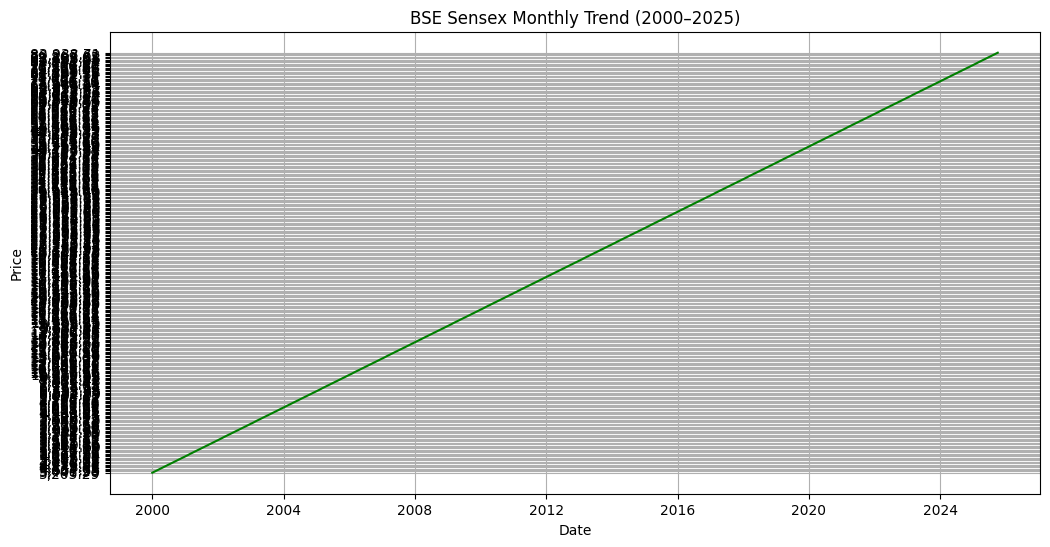

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['Price'], color='green')
plt.title('BSE Sensex Monthly Trend (2000–2025)')
plt.xlabel('Date'); plt.ylabel('Price')
plt.grid(True)
plt.show()

##### 2.1.2 Daily Returns Distribution

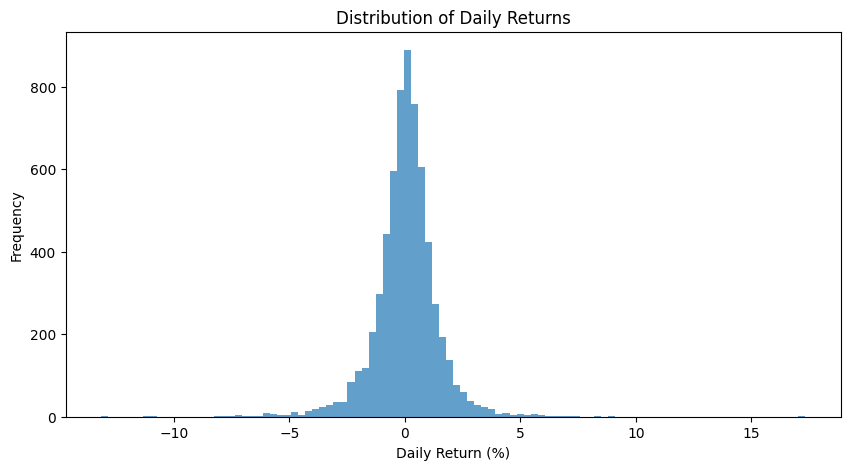

In [25]:
daily['Price'] = daily['Price'].str.replace(',', '').astype(float)
daily['Daily Return'] = daily['Price'].pct_change() * 100

plt.figure(figsize=(10,5))
plt.hist(daily['Daily Return'].dropna(), bins=100, alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)'); plt.ylabel('Frequency')
plt.show()

###### The histogram forms a bell-shaped curve, meaning most daily returns cluster around 0%, which is typical for stock indices.

However, you can see fatter tails (on both sides).

*   This means extreme positive and negative returns happen more often than a perfect normal distribution would predict — a hallmark of real financial data

##### 2.1.2 Compare Time-Frames

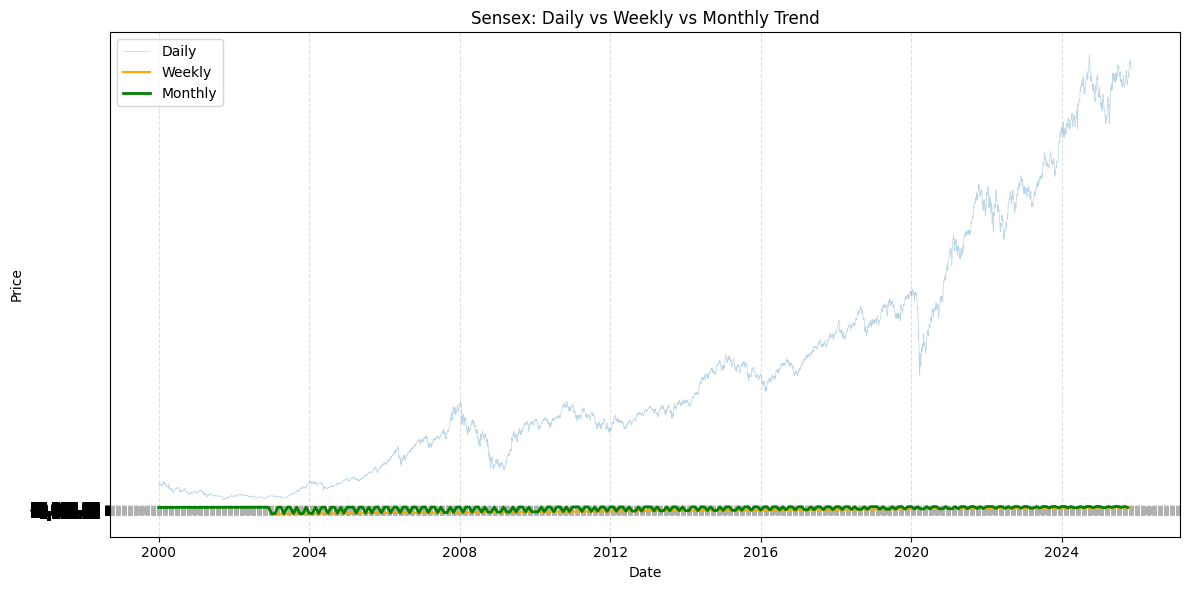

In [26]:
plt.figure(figsize=(12,6))
plt.plot(daily['Price'], label='Daily', alpha=0.3, linewidth=0.5)
plt.plot(weekly['Price'], label='Weekly', color='orange', linewidth=1.5)
plt.plot(monthly['Price'], label='Monthly', color='green', linewidth=2)

plt.title('Sensex: Daily vs Weekly vs Monthly Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Moving Averages for months

In [93]:
monthly['Price'] = pd.to_numeric(monthly['Price'].astype(str).str.replace(',', ''), errors='coerce')

monthly['MA3']  = monthly['Price'].rolling(3).mean()
monthly['MA6']  = monthly['Price'].rolling(6).mean()
monthly['MA12'] = monthly['Price'].rolling(12).mean()

monthly = monthly.dropna(subset=['MA12'])

monthly_used = monthly.dropna().copy()

In [32]:
features = monthly[['Price', 'MA3', 'MA6', 'MA12']]

### Deep Learning to Daily

#### Let's Apply LSTM to the daily data as 2020 and 2021 has major changes because of COVID. Which we can observe in 2.1.2. So, Let's take 2022 to 2025

In [121]:
daily_2022_25 = daily.loc['2022':'2025']
daily_2022_25.tail()

,index,Price,Open,High,Low,Vol.,Change %,Daily Return
Date,,,,,,,,
2025-10-31,4,83938.71,"84,379.79","84,712.79","83,905.66",13.27M,-0.55%,-0.551807
2025-11-03,3,83978.49,"83,835.10","84,127.00","83,609.54",1.35M,0.05%,0.047392
2025-11-04,2,83459.15,"84,000.64","84,068.01","83,412.77",9.51M,-0.62%,-0.618420
2025-11-06,1,83311.01,"83,516.69","83,840.51","83,243.07",17.92M,-0.18%,-0.177500
2025-11-07,0,83361.26,"83,150.15","83,389.26","82,672.31",13.91M,0.06%,0.060316


#### Let's Train LSTM with Moving AVERGAES

In [33]:
## Scaling the Features
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [34]:
## Let's Create The Sequuencies
def create_sequences_multivariate(data, window=12):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])  # all features
        y.append(data[i][0])       # ONLY predict Price (1st column)
    return np.array(X), np.array(y)

window = 12
X, y = create_sequences_multivariate(scaled_features, window)

# Reshape: (samples, time_steps, features)
X.shape, y.shape


((276, 12, 4), (276,))

In [35]:
### Splitting of Data set
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [36]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


# Training the Modle
history = model.fit(X_train, y_train, epochs=40, batch_size=8, validation_split=0.1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0184 - val_loss: 0.0101
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7592e-04 - val_loss: 0.0038
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.0492e-04 - val_loss: 0.0035
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.5405e-04 - val_loss: 0.0035
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2662e-04 - val_loss: 0.0038
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6785e-04 - val_loss: 0.0037
Epoch 10/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3721e-04 - val_loss: 0.0042
Epoch 11/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4837e-04 - val_loss: 0.0037
Epoch 12/40
25/25 ━━━━━━━━━━━━━━━━━

In [38]:
## Testing the modle
pred = model.predict(X_test)

# Convert predictions back to price scale
dummy = np.zeros((len(pred), scaled_features.shape[1]))
dummy[:,0] = pred[:,0]
pred_actual = scaler.inverse_transform(dummy)[:,0]

actual_prices = scaler.inverse_transform(
    np.column_stack((y_test, np.zeros((len(y_test),3))))
)[:,0]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


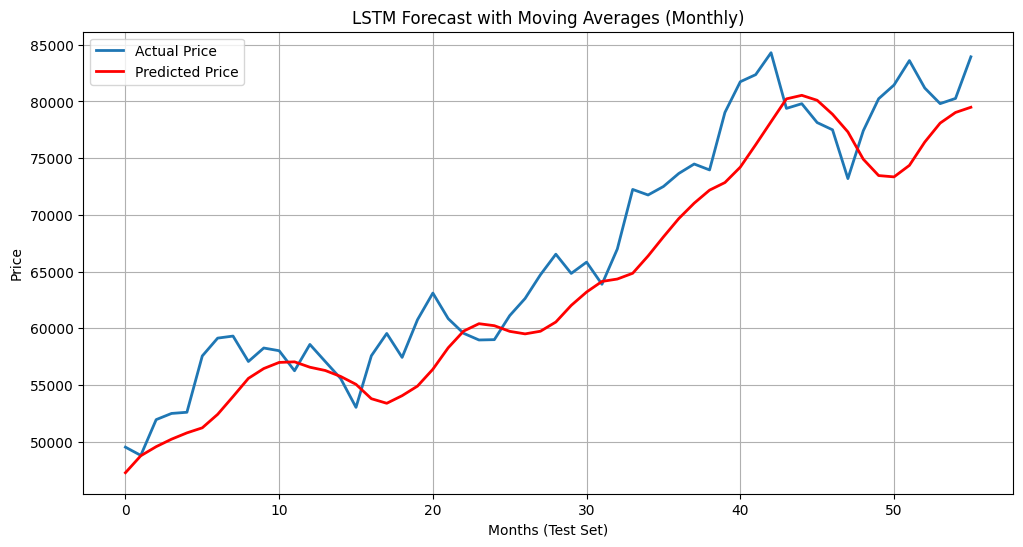

In [41]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price', linewidth=2)
plt.plot(pred_actual, label='Predicted Price', linewidth=2, color='red')
plt.title("LSTM Forecast with Moving Averages (Monthly)")
plt.xlabel("Months (Test Set)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
### Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(actual_prices, pred_actual))
mae  = mean_absolute_error(actual_prices, pred_actual)
mape = np.mean(np.abs((actual_prices - pred_actual) / actual_prices)) * 100

print("RMSE :", round(rmse, 2))
print("MAE  :", round(mae, 2))
print("MAPE :", round(mape, 2), "%")


RMSE : 4173.6
MAE  : 3440.93
MAPE : 5.05 %


In [45]:
actual_dir = np.sign(np.diff(actual_prices.reshape(-1)))
pred_dir   = np.sign(np.diff(pred_actual.reshape(-1)))

direction_accuracy = np.mean(actual_dir == pred_dir) * 100

print("Direction Accuracy:", round(direction_accuracy, 2), "%")


Direction Accuracy: 56.36 %


### Attention Layer

In [80]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input: (batch, time, features)
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),   # time dimension
            initializer="zeros",
            trainable=True
        )
        super().build(input_shape)

    def call(self, x):
        # x: (batch, time, features)
        e = K.tanh(K.dot(x, self.W) + self.b)   # (batch, time, 1)
        a = K.softmax(e, axis=1)                # attention weights (batch, time, 1)
        context = K.sum(x * a, axis=1)          # weighted sum -> (batch, features)
        return context, a                       # return both: pooled output and weights


In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

window = X_train.shape[1]
nfeat  = X_train.shape[2]

inp = Input(shape=(window, nfeat), name='input')
x = LSTM(64, return_sequences=True)(inp)
x = Dropout(0.2)(x)
x = LSTM(32, return_sequences=True)(x)

att_out, att_weights = Attention(name="attention")(x)   # <- returns (context, weights)
price_out = Dense(1, name="price")(att_out)             # final price prediction

# Dual-output model: price + attention weights
model = tf.keras.Model(inputs=inp, outputs=[price_out, att_weights], name="lstm_att")
model.compile(optimizer='adam', loss=['mse', 'mse'], loss_weights=[1.0, 0.0])  # ignore att loss
model.summary()


Model: "lstm_att"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 12, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 12, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 12, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ [(None, 32), (None,    │            44 │
│                                 │ 12, 1)]                │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ price (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,157 (117.80 KB)

 Trainable params: 30,157 (117.80 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
import numpy as np

dummy_att_train = np.zeros((len(X_train), window, 1), dtype='float32')

history = model.fit(
    X_train,
    [y_train, dummy_att_train],
    epochs=40,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - attention_loss: 0.0069 - loss: 0.0135 - price_loss: 0.0135 - val_attention_loss: 0.0070 - val_loss: 0.0088 - val_price_loss: 0.0097
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - attention_loss: 0.0069 - loss: 0.0019 - price_loss: 0.0019 - val_attention_loss: 0.0070 - val_loss: 0.0036 - val_price_loss: 0.0038
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - attention_loss: 0.0070 - loss: 0.0015 - price_loss: 0.0015 - val_attention_loss: 0.0070 - val_loss: 0.0038 - val_price_loss: 0.0039
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - attention_loss: 0.0070 - loss: 0.0012 - price_loss: 0.0012 - val_attention_loss: 0.0070 - val_loss: 0.0038 - val_price_loss: 0.0042
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - attention_loss: 0.0070 - loss: 0.0014 - price_loss: 0.0014 - val_attention_loss: 0.0070 - val_loss: 0.0037 - val_price_loss: 0.0039
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - attention_loss: 0.0070

In [83]:
pred_price, att = model.predict(X_test, verbose=0)
# pred_price: (batch, 1)
# att       : (batch, window, 1)
print(pred_price.shape, att.shape)


(56, 1) (56, 12, 1)


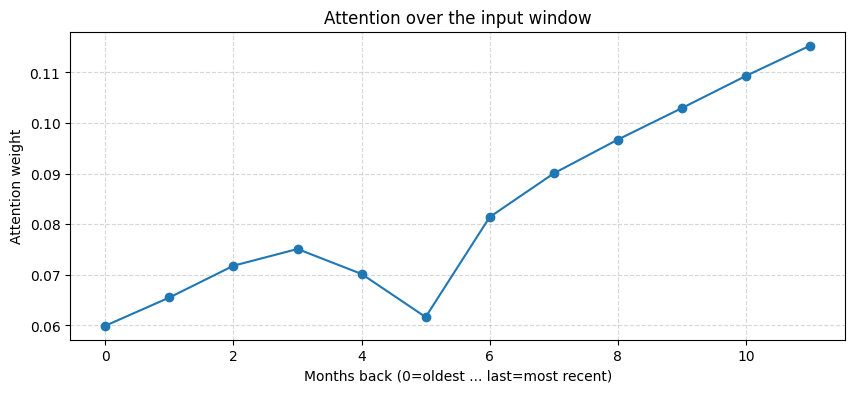

In [84]:
import matplotlib.pyplot as plt

sample = -1                        # pick any test sample
weights = att[sample, :, 0]        # (window,)

plt.figure(figsize=(10,4))
plt.plot(weights, marker='o')
plt.title("Attention over the input window")
plt.xlabel("Months back (0=oldest ... last=most recent)")
plt.ylabel("Attention weight")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [85]:
pred_price, att = model.predict(X_test, verbose=0)


/tmp/ipython-input-2611106502.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


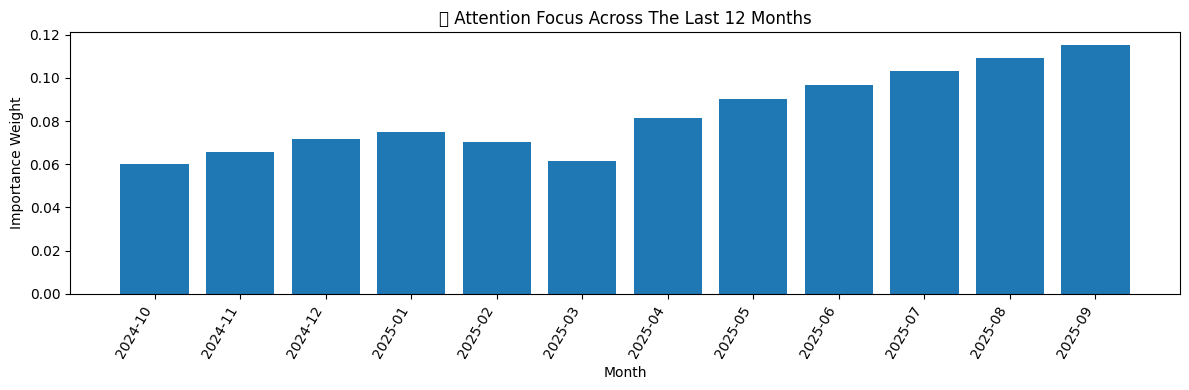

In [86]:
# Choose which predicted sample to inspect (-1 means last / most recent)
sample = -1

weights = att[sample, :, 0]      # shape: (window,)
window = X_train.shape[1]

# Find matching date range from monthly index
split = int(len(X) * 0.8)
index_in_full = split + (sample if sample >= 0 else len(X_test) + sample)
start = index_in_full
end = index_in_full + window

window_dates = monthly.index[start:end]

plt.figure(figsize=(12,4))
plt.bar(range(window), weights)
plt.xticks(range(window), [d.strftime('%Y-%m') for d in window_dates], rotation=60, ha='right')
plt.title("🔍 Attention Focus Across The Last {} Months".format(window))
plt.xlabel("Month")
plt.ylabel("Importance Weight")
plt.tight_layout()
plt.show()


Interpretation:
*  Higher bar = model thinks that month was more important in predicting the next month.
*   Recent months higher → trend-following market
*   Older months higher → momentum reversal / cycle shift

###### Heatmap accross Multiple Predictions

/tmp/ipython-input-627171615.py:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


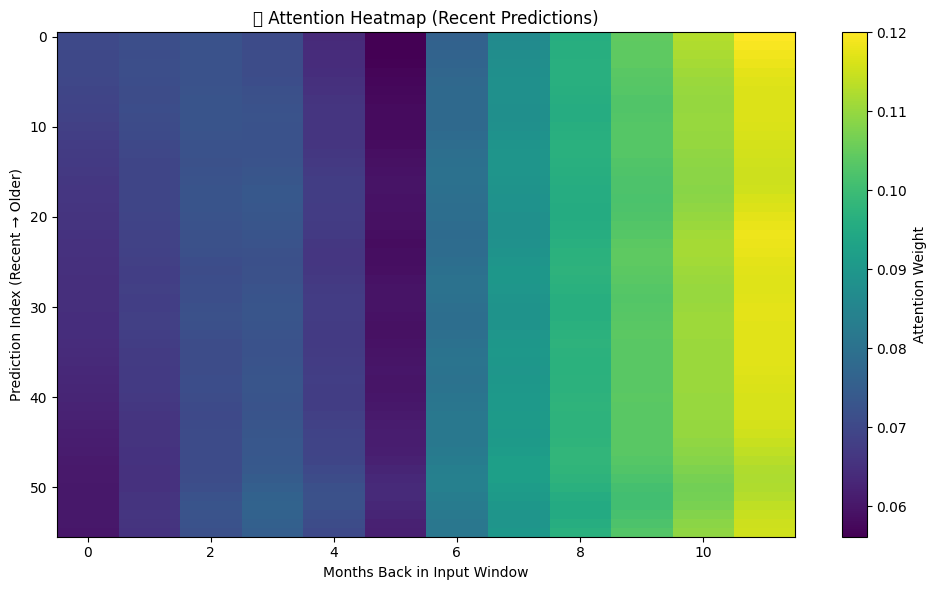

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Pick how many test predictions to visualize
N = min(60, att.shape[0])   # last 60 predictions

A = att[-N:, :, 0]  # shape: (N, window)

plt.figure(figsize=(10,6))
plt.imshow(A, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Attention Weight')
plt.title("🔥 Attention Heatmap (Recent Predictions)")
plt.xlabel("Months Back in Input Window")
plt.ylabel("Prediction Index (Recent → Older)")
plt.tight_layout()
plt.show()


## Now, Lets Do with N-Beats Algorithm

#### N-BEATS (Neural Basis Expansion Analysis for Time Series Forecasting) revolutionizes the approach to time series predictions. Distinct from typical models that depend on recurrent neural networks (RNNs), N-BEATS employs a series of feed-forward neural networks.

In [91]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.2/263.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 53.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0


In [95]:
nbeats_df = monthly_used.copy()   # <-- use your cleaned monthly dataframe
nbeats_df = nbeats_df[['Price']].copy()
nbeats_df['ds'] = nbeats_df.index
nbeats_df['unique_id'] = 'SENSEX'
nbeats_df = nbeats_df[['unique_id', 'ds', 'Price']]
nbeats_df = nbeats_df.rename(columns={'Price':'y'})
nbeats_df.head()

,unique_id,ds,y
Date,,,
2003-09-01,SENSEX,2003-09-01,4453.24
2003-10-01,SENSEX,2003-10-01,4906.87
2003-11-01,SENSEX,2003-11-01,5044.82
2003-12-01,SENSEX,2003-12-01,5838.96
2004-01-01,SENSEX,2004-01-01,5695.67


In [ ]:
## Training N-BEATS
from neuralforecast.models import NBEATS
from neuralforecast import NeuralForecast

HORIZON = 12   # number of future months to forecast

model = NBEATS(
    h=HORIZON,
    input_size=36,
    max_steps=2000,
)

nf = NeuralForecast(
    models=[model],
    freq='M'             # monthly data
)
nf.fit(df=nbeats_df)


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
1.2 K     Non-trainable params
2.5 M     Total params
9.889     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecast = nf.predict()
forecast.tail(HORIZON)


In [ ]:
#Plotting N-BEATS prediction/forecating
plt.figure(figsize=(12,6))
plt.plot(nbeats_df['ds'], nbeats_df['y'], label='History', linewidth=2)
plt.plot(forecast['ds'], forecast['NBEATS'], label='N-BEATS Forecast', linewidth=2, color='red')
plt.title("N-BEATS Monthly Sensex Forecast")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
